<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center><img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'></center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Linear regression

In this exercise you will use linear regression to predict flat prices. Training will be handled via gradient descent and we will:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a non-standard loss function.

Let's start with getting the data.

In [ ]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2024-11-03 22:33:26--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/3x5umw93vtxvmp037wczv/mieszkania.csv?rlkey=dmvzaueu361g7s2w6ui6m9ryb&dl=1 [following]
--2024-11-03 22:33:27--  https://www.dropbox.com/scl/fi/3x5umw93vtxvmp037wczv/mieszkania.csv?rlkey=dmvzaueu361g7s2w6ui6m9ryb&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f03e8841f78a438913441e6f4.dl.dropboxusercontent.com/cd/0/inline/Cdt60tSXEYvwu_Z3rp_QKmdTBS_RLBvSgenKGLXHo5iDRgqc7CkbSWVpRDMPDtlCsNSC4_vnVSCLF1sMUvgQjqHQAbRMNeokIcRl8AnK4CgLprg3WExzBFhBHjpFK_Sn79M/file?dl=1# [following]
--2024-11-03 22:33:28--  https://uc0f03e8841f78a438913441e6f4.dl.dropboxusercontent.com/cd/0/

In [ ]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilosc_sypialni,ilosc_lazienek,rok_budowy,parking_podziemny`).

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [ ]:
import numpy as np

def msle(ys, ps):
    assert len(ys) == len(ps)

    np_ys = np.array(ys)
    np_ps = np.array(ps)

    return np.mean((np.log(1 + np_ys) - np.log(1 + np_ps))**2)

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [ ]:
training_data = np.genfromtxt('mieszkania.csv', dtype=None, delimiter=',', skip_header=1, encoding=None)

ys = np.array([elem[6] for elem in training_data])
ms = np.array([np.mean(ys) for elem in training_data])

print(msle(ys, ms))

0.3915253538257009


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [ ]:
c = 0.84942
print(msle(ys, c*ms))

0.36488961222515215


Now, let's implement a standard linear regression model.

0.5431837381095762


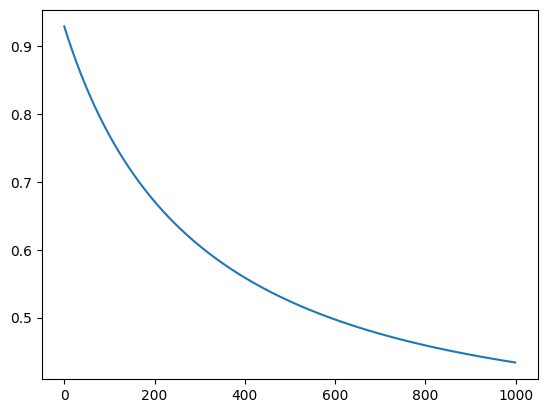

In [ ]:
import matplotlib.pyplot as plt

xs = np.stack([[elem[0] for elem in training_data],
               [elem[1] == 'grodziskowo' for elem in training_data],
               [elem[1] == 'mokotowo' for elem in training_data],
               [elem[1] == 'ochotowo' for elem in training_data],
               [elem[1] == 'wolowo' for elem in training_data],
               [elem[2] for elem in training_data],
               [elem[3] for elem in training_data],
               [elem[4] for elem in training_data],
               [elem[5] for elem in training_data],
               [1 for elem in training_data]], axis=1)

test_data = np.genfromtxt('mieszkania_test.csv', dtype=None, delimiter=',', skip_header=1, encoding=None)

test_ys = np.array([elem[6] for elem in test_data])
test_xs = np.stack([[elem[0] for elem in test_data],
                    [elem[1] == 'grodziskowo' for elem in test_data],
                    [elem[1] == 'mokotowo' for elem in test_data],
                    [elem[1] == 'ochotowo' for elem in test_data],
                    [elem[1] == 'wolowo' for elem in test_data],
                    [elem[2] for elem in test_data],
                    [elem[3] for elem in test_data],
                    [elem[4] for elem in test_data],
                    [elem[5] for elem in test_data],
                    [1 for elem in test_data]], axis=1)

weights = np.ones(10)
lr = 10
n_epochs = 1000

def predict(ws, xs=xs):
    return xs @ ws

def gradient(ps, xs=xs, ys=ys):
    return ((2 * (np.log(1 + ps) - np.log(1 + ys)) / (1 + ps)) @ xs) / np.size(ps)

def evaluate(ws, xs=test_xs, ys=test_ys):
    return msle(ys, predict(ws, xs))

def linear_regression(ws, lr, epochs, xs=xs, ys=ys):
    losses = []

    for i in range(epochs):
        ws = ws - lr * gradient(predict(ws, xs), xs, ys)
        losses.append(evaluate(ws, xs, ys))

    return ws, losses

trained_weights, losses = linear_regression(weights, lr, n_epochs)
print(evaluate(trained_weights))
plt.plot(losses)

Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint:
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change the algorithm.
</sup></sub></sup></sub></sup></sub>

0.09778370867841918


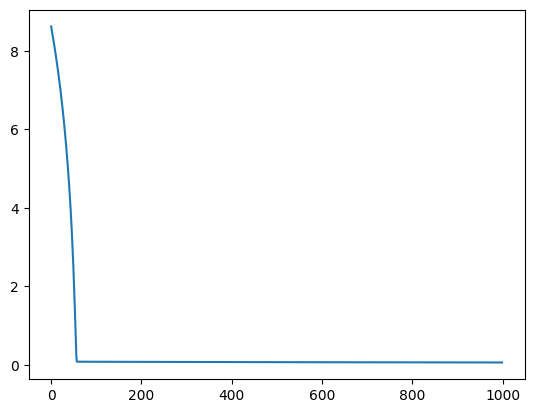

In [ ]:
weights = np.random.rand(10)*5000
lr = 30000
n_epochs = 1000

trained_weights, losses = linear_regression(weights, lr, n_epochs)
print(evaluate(trained_weights))
plt.plot(losses)

Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code.

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint:
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2:
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

In [ ]:
def get_features(dataset):
    columns = []

    for i in range(9):
        for j in range(i, 9):
            if i >= 1 and i <= 4 and j >= 1 and j <= 4 and i != j:
                continue

            if i != j:
                columns.append([elem[i] * elem[j] for elem in dataset])

    columns.append([1 for elem in dataset])

    return np.stack(columns, axis=1)

new_xs = get_features(xs)
new_test_xs = get_features(test_xs)

[ 0.7736467   1.1361794   1.15746527  0.93287114  0.99639444  0.99455688
  2.98983074  1.03023808  0.99424625  0.99512327 -6.02485901  0.99806122
  1.00368867  1.00303891  5.297656    1.00118541  1.0041148   1.00348161
  5.8841782   1.00135033  0.99872134  0.99909394  0.49569627  1.00022473
  1.00070813  2.54785672  1.00125285  2.47569241  1.00090828  2.61068562
  1.00083814]
0.04278171300157606
0.06704612494553472


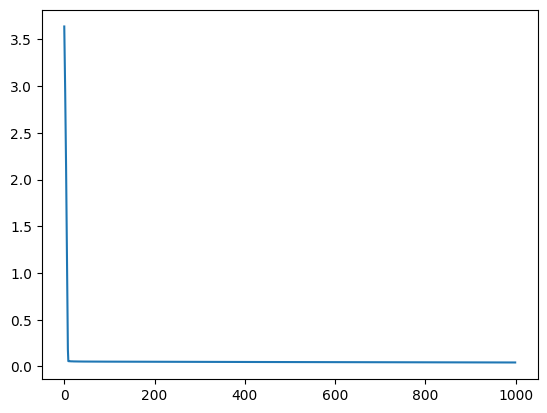

In [ ]:
weights = np.ones(31)
lr = 10
n_epochs = 1000

trained_weights, losses = linear_regression(weights, lr, n_epochs, new_xs)
print(trained_weights)
print(evaluate(trained_weights, new_xs, ys))
print(evaluate(trained_weights, new_test_xs))
plt.plot(losses)